# 🏠 House Price Prediction using Linear Regression

"""
📘 Objective:
This project uses the California Housing Prices dataset to predict
the median house value for districts in California.

We’ll analyze relationships between features like:
- median_income
- housing_median_age
- location (longitude & latitude)

and build a regression model to predict house prices.
"""


In [1]:
# === Cell 1: Upload dataset from your computer ===
from google.colab import files
import pandas as pd

# Choose the file you downloaded from Kaggle (e.g., california_housing.csv)
uploaded = files.upload()

# Read the uploaded file (it will take the first uploaded filename automatically)
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("Dataset shape:", df.shape)
df.head()


Saving housing.csv to housing.csv
Dataset shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# === Cell 2: Clean data & create new features ===
df.info()
print("\nMissing values:\n", df.isnull().sum())

# Fill missing total_bedrooms with median
if "total_bedrooms" in df.columns:
    df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

# Create new useful features
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB

Missing valu

/tmp/ipython-input-1357887110.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)


,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
housing_median_age,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
total_rooms,20640.0,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,39320.000000
total_bedrooms,20640.0,536.838857,419.391878,1.000000,297.000000,435.000000,643.250000,6445.000000
population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
households,20640.0,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6082.000000
median_income,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
median_house_value,20640.0,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,500001.000000
rooms_per_household,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091


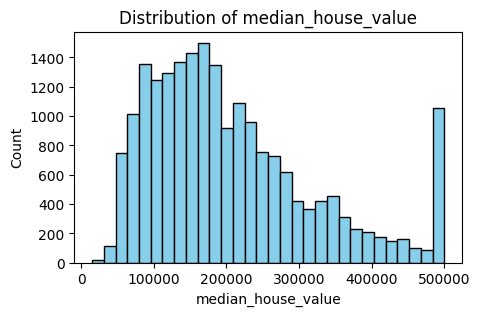

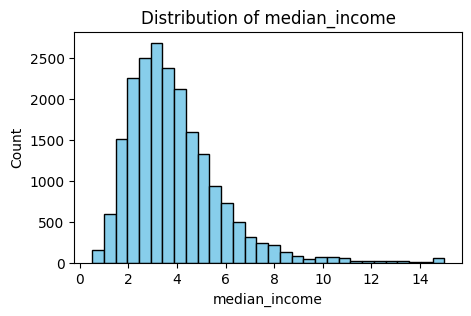

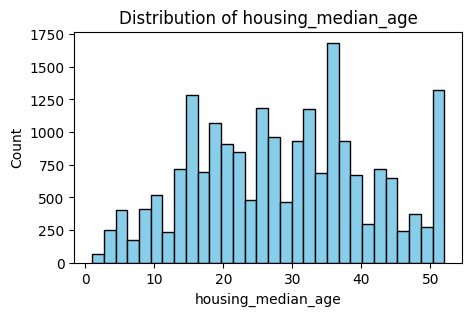

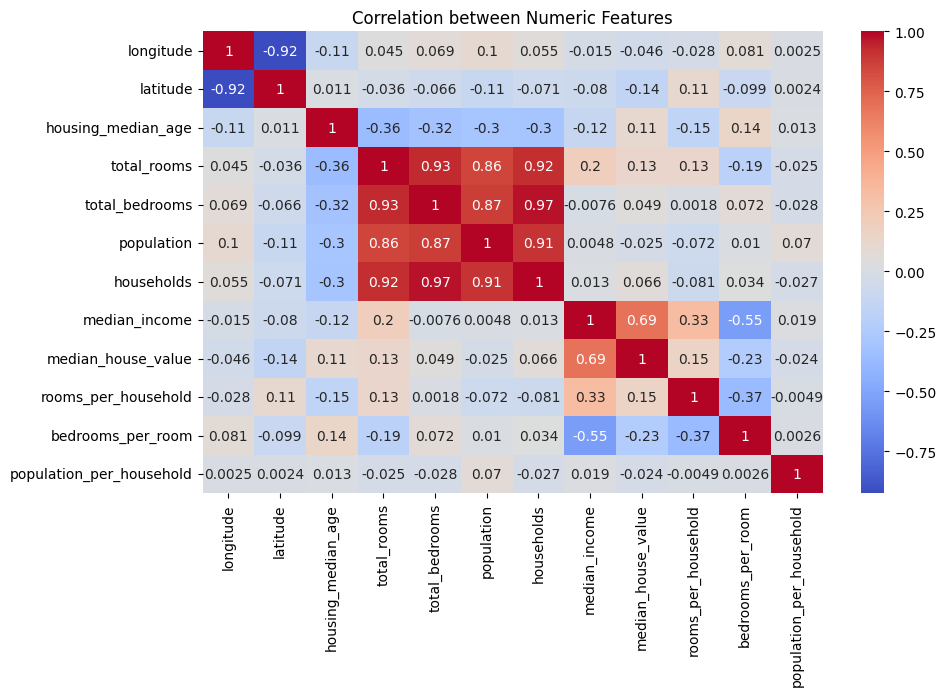

In [7]:
# === Cell 3: Basic visualizations ===
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for main numeric columns
for col in ["median_house_value", "median_income", "housing_median_age"]:
    plt.figure(figsize=(5,3))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Compute correlation only for numeric columns
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Numeric Features')
plt.show()


In [8]:
# === Cell 4: Prepare features and target ===
from sklearn.model_selection import train_test_split

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=["float64", "int64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

print("Numeric columns:", list(numeric_cols))
print("Categorical columns:", list(cat_cols))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Numeric columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
Categorical columns: ['ocean_proximity']


In [9]:
# === Cell 5: Build a Linear Regression model ===
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Numeric & categorical preprocessing
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, numeric_cols),
    ('cat', cat_pipe, cat_cols)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)
print("✅ Model trained successfully!")


✅ Model trained successfully!


RMSE: 72668.54
R² Score: 0.5970


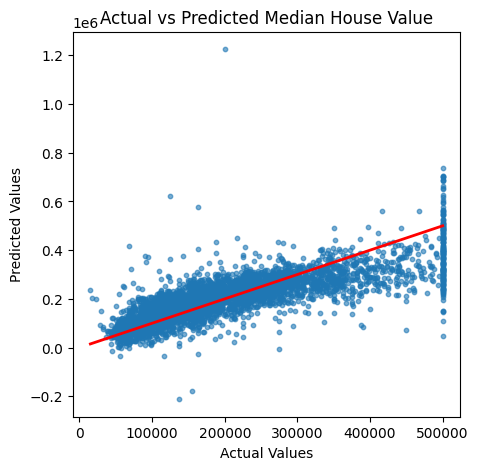

In [10]:
# === Cell 6: Evaluate performance ===
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=10, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Median House Value")
plt.show()


"""
📊 Conclusion:
- The Linear Regression model achieved an R² around ~0.6, meaning it explains about 60% of the variation in house prices.
- Median income was the strongest predictor of house value.
- Geographic features (latitude/longitude) also influenced price.

⚙️ Model Limitations:
- Linear Regression assumes linear relationships and may underfit complex data.
- No interaction or polynomial terms were used.
- Outliers and heteroscedasticity may affect prediction accuracy.

🚀 Possible Improvements:
- Try more advanced models (RandomForest, XGBoost, etc.).
- Use cross-validation for better performance estimation.
- Add polynomial or interaction features to capture nonlinear effects.
"""


In [13]:
# ---Save the cleaned data to CSV file ---
cleaned_filename = "california_housing_cleaned.csv"
df.to_csv(cleaned_filename, index=False)
print("✅ Cleaned data saved as:", cleaned_filename)

# --- Step 2: Download it to your local machine ---
from google.colab import files
files.download(cleaned_filename)


✅ Cleaned data saved as: california_housing_cleaned.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>